<b><font size=6>Project 3 Machine Learning - Classification<b>

In my part I have to apply **Bayes Classifiers** and **Support Vector Machines** for what concerns **CLASSIFICATION** and **Linear and Polynomial Regressor**, that are methods for **REGRESSION**

In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from tqdm.notebook import tqdm

label_encoder = LabelEncoder()
scaler = StandardScaler()

In [3]:
dfTest = pd.read_csv('https_test.csv')
dfTrain = pd.read_csv('https_training.csv')
dfTest.drop(columns=['c_ip', 'time'], inplace=True)
dfTrain.drop(columns=['c_ip', 'time'], inplace=True)

<b><font size=5>Bayes Classifiers<b>

In [4]:
# I don't need to split data as they are already splitted

X_train = dfTrain.iloc[:, :-1]
X_test = dfTest.iloc[:, :-1]
#print(X_train)
y_train = dfTrain['label']
#y_trainLabeled = label_encoder.fit_transform(y_train) # I transform label values in a numerical ones
y_trainLabeled = pd.Categorical(y_train).codes
y_test = dfTest['label']
#y_testLabeled = label_encoder.transform(y_test) # I transform label values in a numerical ones
y_testLabeled = pd.Categorical(y_test).codes
#print(X_train)

In [5]:
# I scale the dataset

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#X_test_scaled_2 = scaler.transform(X_test_2)
#print(type(X_train_scaled))

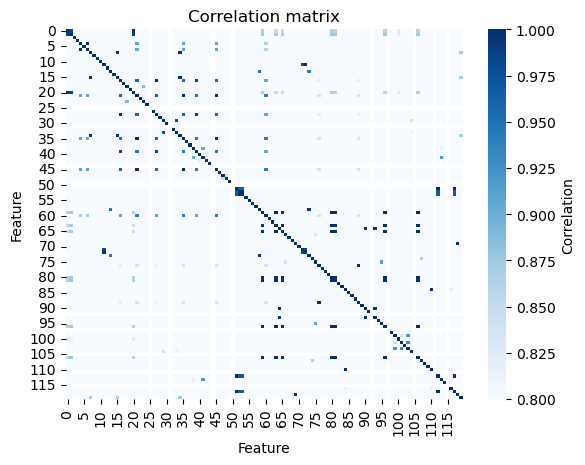

In [6]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_test_scaled = pd.DataFrame(X_test_scaled)
#X_test_scaled_2 = pd.DataFrame(X_test_scaled_2)


correlation_matrix = X_train_scaled.corr().abs()

# Compute the heatmap
plt.figure()
sns.heatmap(correlation_matrix, cmap='Blues', vmin=0.8, vmax=1, cbar_kws={'label':'Correlation'})
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

In [7]:
# I remove highly correlated features

# features = X_train_scaled.columns
# print(features)
# X_test_scaled = pd.DataFrame(X_test_scaled)
# removed_columns = []

# for f in features:
#     if f in correlation_matrix.columns:
#         col = []
#         for i, a in enumerate(correlation_matrix.loc[f]):
#             if a > 0.7 and f != correlation_matrix.columns[i]:
#                 col.append(correlation_matrix.columns[i])
                
#         # Aggiungi le colonne rimosse alla lista accumulativa
#         removed_columns.extend(col)
#         correlation_matrix = correlation_matrix.drop(col, axis='columns')
#         correlation_matrix = correlation_matrix.drop(col, axis='index')
#         X_train_scaled = X_train_scaled.drop(col, axis='columns')
#         X_test_scaled = X_test_scaled.drop(col, axis='columns')
# print(len(removed_columns), 'features are removed')
# print(correlation_matrix)

# for f in features:
#     if f in correlation_matrix.columns:
#         col = [correlation_matrix.columns[i] for i, a in enumerate(correlation_matrix.loc[f]) if a > 0.7 and f != correlation_matrix.columns[i]]
        
#         # Filtra solo le colonne presenti nel DataFrame
#         col = [c for c in col if c in X_train_scaled.columns]

#         correlation_matrix = correlation_matrix.drop(col, axis='columns')
#         correlation_matrix = correlation_matrix.drop(col, axis='index')
#         X_train_scaled = X_train_scaled.drop(col, axis='columns')
#         X_test_scaled = X_test_scaled.drop(col, axis='columns')

# print(len(col), 'features are removed')

"""
# extract features having a correlation > 0.8
c = correlation_matrix[correlation_matrix>0.6]
s = c.unstack()
so = s.sort_values(ascending=False).reset_index()
print(c)
print(s)
print(so)
# get strongly correlatead features removing pairs having correlation = 1 because of the diagonal, i.e., correlation between one feature and itself
so = so[(so[0].isnull()==False) & (so["level_0"] != so["level_1"])]
#print(so)
to_be_deleted = []
candidates = list(so["level_0"])

# get the unique set of features to be deleted. Notice that we discard one feature per time considering the case where a feature is strongly correlated with multiple features
subset_so = so
for candidate in candidates:
    if (candidate in list(subset_so["level_0"])): 
        to_be_deleted.append(candidate)
        subset_so = subset_so[(subset_so["level_0"] != candidate) & (subset_so["level_1"] != candidate)]

# to_be_deleted contains the index of columns that you need to remove from both training and test sets
print(len(to_be_deleted), 'features are removed')
print(X_train_scaled.shape)
# remove the correlated features from bot sets

# Create a mask for the columns to keep
columns_to_keep = np.ones(X_train_scaled.shape[1], dtype=bool)
columns_to_keep[to_be_deleted] = False
print(columns_to_keep.size)
# Use the mask to select only the columns to keep
X_train_scaled = X_train_scaled[:, columns_to_keep]
X_test_scaled = X_test_scaled[:, columns_to_keep]
"""

def correlated_features_to_remove(correlation_matrix):
    to_delete = []
    for i, f1 in enumerate(correlation_matrix):
        for j, f2 in enumerate(correlation_matrix) :
            if ((i!=j) and (correlation_matrix.iloc[i, j]>0.8) and (f2 not in to_delete)):
                to_delete.append(f1)
                break
    return to_delete

to_delete = correlated_features_to_remove(correlation_matrix)

print(len(to_delete), 'features are removed')

47 features are removed


In [8]:
# Predict on test dataset
gnb = GaussianNB()

gnb.fit(X_train_scaled, y_trainLabeled)
y_train_pred_gnb = gnb.predict(X_train_scaled)
y_test_pred_gnb = gnb.predict(X_test_scaled)

Training set
              precision    recall  f1-score   support

           0       0.54      0.01      0.02     35083
           1       0.38      0.04      0.08      3839
           2       0.04      0.18      0.06      1325
           3       0.04      0.58      0.08      1413
           4       0.09      0.43      0.15      2824
           5       0.08      0.04      0.06      3173
           6       0.08      0.25      0.12      3408
           7       0.67      0.58      0.62      1309
           8       0.02      0.03      0.02      1869
           9       0.47      0.94      0.63      3455
          10       0.34      0.02      0.04      3886
          11       0.02      0.01      0.01      4271
          12       0.04      0.01      0.01     11144
          13       0.03      0.08      0.04      2182
          14       0.03      0.00      0.00      5637
          15       0.02      0.02      0.02      1967
          16       0.03      0.07      0.04      1270
          17  

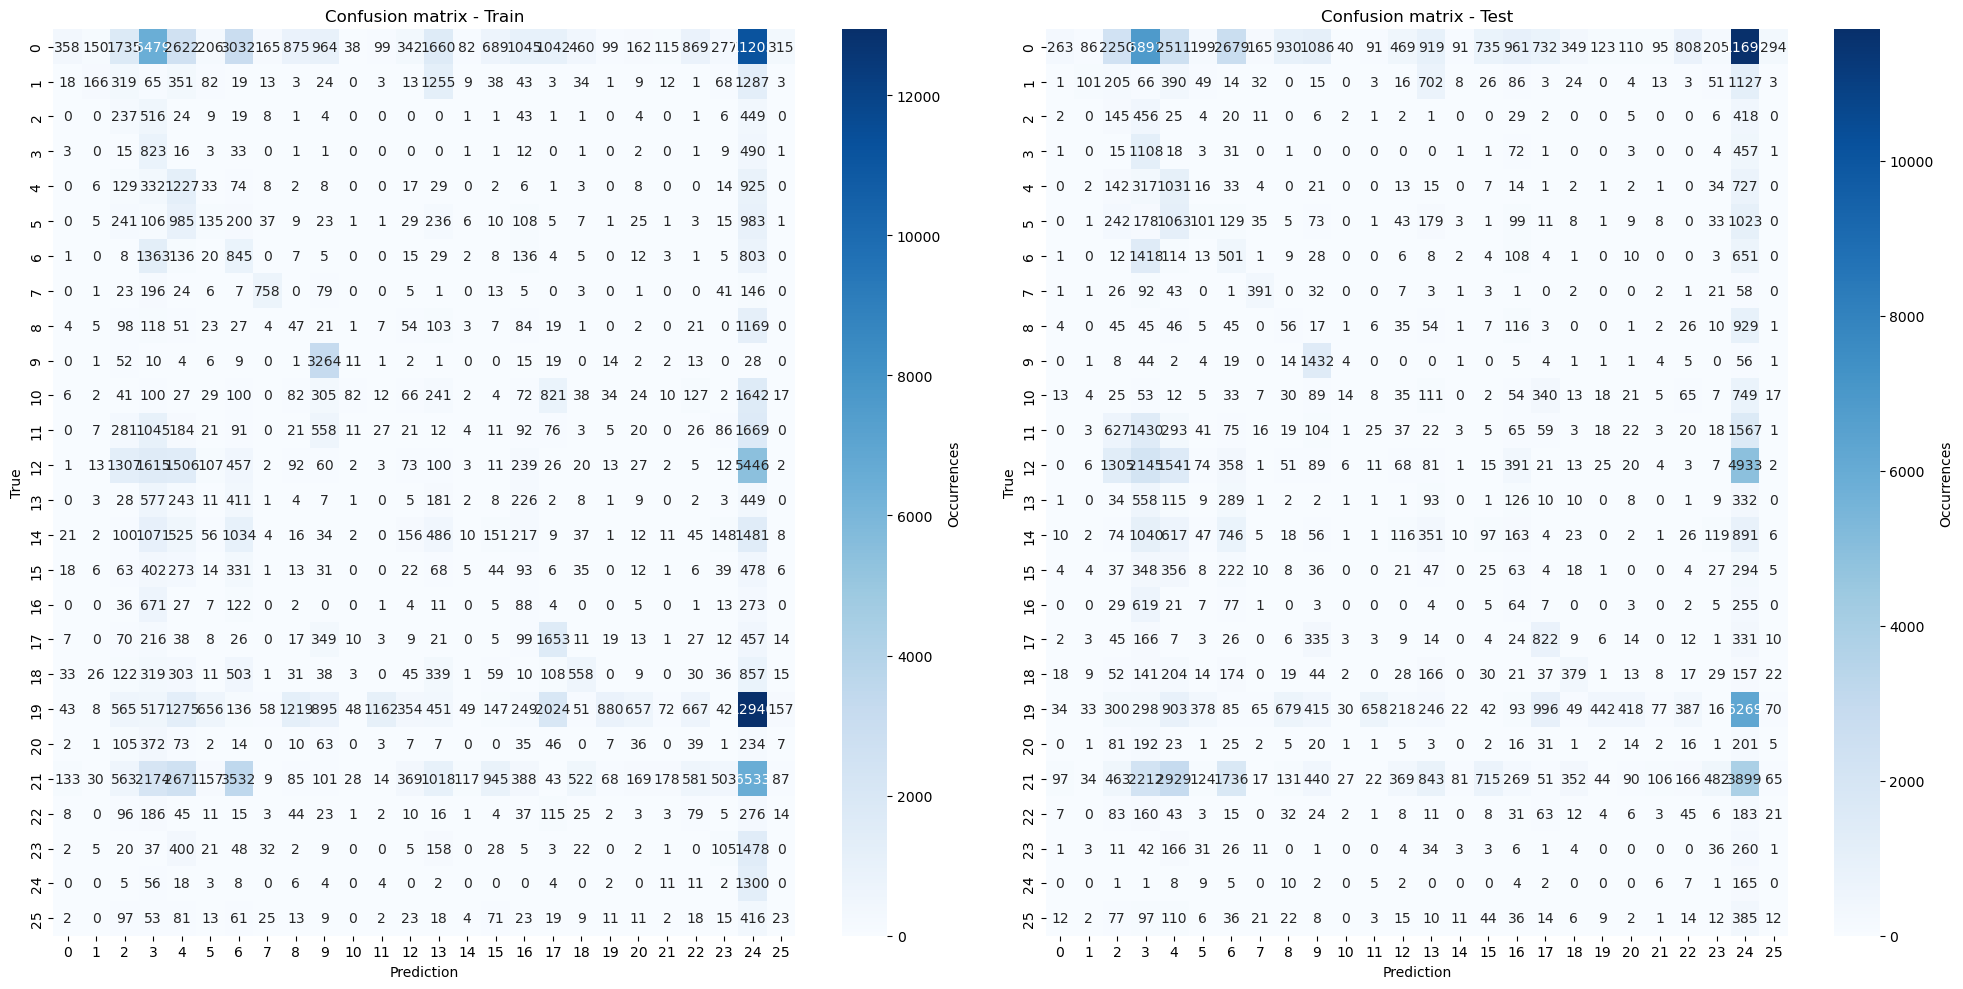

In [9]:
print('Training set')
print(classification_report(y_trainLabeled, y_train_pred_gnb))
print('Test set')
print(classification_report(y_testLabeled, y_test_pred_gnb))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

confusion_train = confusion_matrix(y_trainLabeled, y_train_pred_gnb)
sns.heatmap(confusion_train, cmap='Blues', annot=True, ax=ax1, cbar_kws={'label':'Occurrences'}, fmt='d')
ax1.set_xlabel('Prediction')
ax1.set_ylabel('True')
ax1.set_title('Confusion matrix - Train')

confusion_test = confusion_matrix(y_testLabeled, y_test_pred_gnb)
sns.heatmap(confusion_test, cmap='Blues', annot=True, ax=ax2, cbar_kws={'label':'Occurrences'}, fmt='d')
ax2.set_xlabel('Prediction')
ax2.set_ylabel('True')
ax2.set_title('Confusion matrix - Test')

plt.tight_layout()
plt.show()

<b><font size=5>Grid Search<b>

In [10]:
X_train_scaled, X_val_scaled, y_trainLabeled, y_valLabeled = train_test_split( # X -> features, y -> labels
    X_train_scaled, # X
    y_trainLabeled, # y
    stratify = y_train, # stratify the dataset based on class labels
    train_size = 0.5/0.7, # percentage of training set
    random_state = 15 
)

In [26]:
%%time
parameter_range = {'var_smoothing' : np.logspace(-9, 0, 10)}

clf = GridSearchCV(gnb, parameter_range)
clf.fit(X_train_scaled, y_trainLabeled)

CPU times: user 30.7 s, sys: 2.41 s, total: 33.1 s
Wall time: 33.1 s


GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])})

{'mean_fit_time': array([0.2989068 , 0.28870192, 0.29021087, 0.28784103, 0.28624978,
       0.29639091, 0.2905653 , 0.28414507, 0.28615432, 0.28393512]), 'std_fit_time': array([0.01685744, 0.00180024, 0.00115156, 0.00494087, 0.00219922,
       0.0091921 , 0.00783376, 0.00245612, 0.00233781, 0.00194258]), 'mean_score_time': array([0.37632208, 0.37370234, 0.3749876 , 0.36273756, 0.36393199,
       0.35975208, 0.35876498, 0.36018934, 0.36435504, 0.35844765]), 'std_score_time': array([0.00324004, 0.00470259, 0.00348918, 0.00157808, 0.00265067,
       0.00509041, 0.00423352, 0.00385503, 0.00733872, 0.00464749]), 'param_var_smoothing': masked_array(data=[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                   0.1, 1.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'var_smoothing': 1e-09}, {'var_smoothing': 1e-08}, {'var_smoothing': 1e-07}, {'var_smo

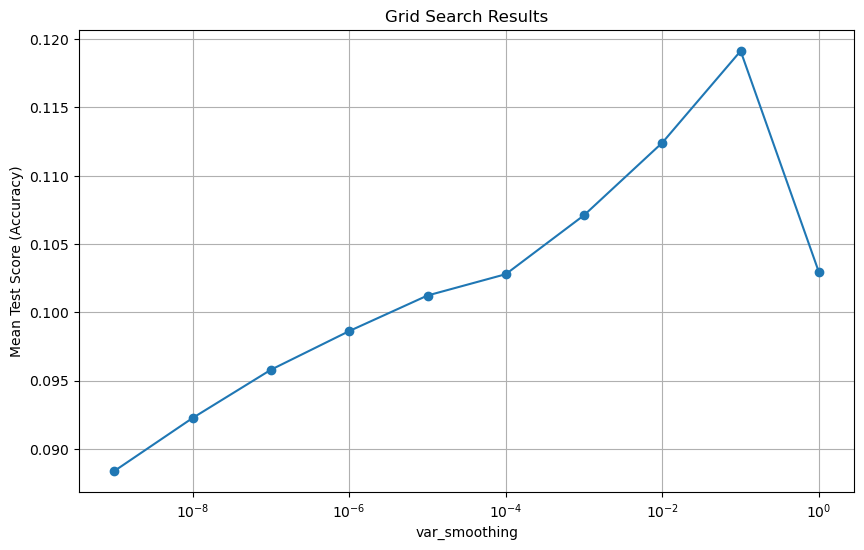

In [27]:
results = clf.cv_results_
print(results)

var_smoothing_values = results['param_var_smoothing'].data.astype(float)
mean_test_scores = results['mean_test_score']

# Plotta i risultati
plt.figure(figsize=(10, 6))
plt.semilogx(var_smoothing_values, mean_test_scores, marker='o')
plt.title('Grid Search Results')
plt.xlabel('var_smoothing')
plt.ylabel('Mean Test Score (Accuracy)')
plt.grid(True)
plt.show()

In [28]:
print("Best Parameters:", clf.best_params_)
print("Best Estimator:", clf.best_estimator_)

Best Parameters: {'var_smoothing': 0.1}
Best Estimator: GaussianNB(var_smoothing=0.1)


In [29]:
cv_results = {'mean_fit_time': np.array([0.3120358 , 0.30341096, 0.3044795 , 0.29591727, 0.33279281,
       0.30323901, 0.29926872, 0.30205913, 0.30249009, 0.3023735 ]), 'std_fit_time': np.array([0.00797603, 0.0034554 , 0.00396401, 0.00211804, 0.00985637,
       0.00282486, 0.00215926, 0.00426188, 0.00306732, 0.00516642]), 'mean_score_time': np.array([0.38332748, 0.38763018, 0.38534746, 0.38133688, 0.3985034 ,
       0.39529653, 0.38623538, 0.38243995, 0.3788022 , 0.38080287]), 'std_score_time': np.array([0.00540204, 0.00398899, 0.00958993, 0.0129704 , 0.00470805,
       0.00634337, 0.00382463, 0.00810156, 0.00538816, 0.00366546]), 'param_var_smoothing': ma.masked_array(data=[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                   0.1, 1.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'var_smoothing': 1e-09}, {'var_smoothing': 1e-08}, {'var_smoothing': 1e-07}, {'var_smoothing': 1e-06}, {'var_smoothing': 1e-05}, {'var_smoothing': 0.0001}, {'var_smoothing': 0.001}, {'var_smoothing': 0.01}, {'var_smoothing': 0.1}, {'var_smoothing': 1.0}], 'split0_test_score': np.array([0.08824086, 0.09108123, 0.09311683, 0.09510509, 0.09680932,
       0.096904  , 0.10144859, 0.10670328, 0.11546109, 0.10419428]), 'split1_test_score': np.array([0.09179567, 0.09586706, 0.09913365, 0.09970175, 0.10197415,
       0.10396251, 0.11002225, 0.11470908, 0.12304123, 0.10898073]), 'split2_test_score': np.array([0.09198504, 0.09605643, 0.09955972, 0.1031577 , 0.10462529,
       0.10471997, 0.10869668, 0.11357288, 0.11565592, 0.09496757]), 'split3_test_score': np.array([0.08412631, 0.08734555, 0.09170099, 0.09667187, 0.10197415,
       0.10618757, 0.10898073, 0.11409364, 0.11944326, 0.11328883]), 'split4_test_score': np.array([0.08573593, 0.09094352, 0.09544099, 0.09847086, 0.10074327,
       0.10216352, 0.10637694, 0.11300478, 0.12204706, 0.09321593]), 'mean_test_score': np.array([0.08837676, 0.09225876, 0.09579044, 0.09862145, 0.10122523,
       0.10278751, 0.10710504, 0.11241673, 0.11912971, 0.10292947]), 'std_test_score': np.array([0.00315492, 0.00330751, 0.00314256, 0.00275437, 0.00254616,
       0.00321498, 0.00306879, 0.0029118 , 0.00314437, 0.00778818]), 'rank_test_score': np.array([10,  9,  8,  7,  6,  5,  3,  2,  1,  4], dtype="int32")}

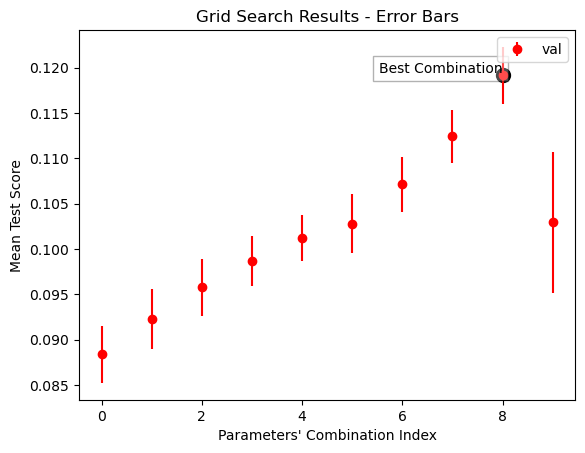

In [30]:
# Access the relevant information from cv_results
param_values = [params for params in cv_results['params']]
mean_test_scores = cv_results['mean_test_score']
std_test_scores = cv_results['std_test_score']

idx_best = np.argmax(cv_results["mean_test_score"])
acc_max = cv_results["mean_test_score"][idx_best]
best_combination = cv_results['params'][idx_best]

# Convert to numpy arrays
param_values = np.array(param_values)
mean_test_scores = np.array(mean_test_scores)
std_test_scores = np.array(std_test_scores)

idx_best = np.argmax(cv_results["mean_test_score"])
acc_max = cv_results["mean_test_score"][idx_best]

# Plotting
plt.errorbar(range(len(param_values)), mean_test_scores, yerr=std_test_scores, marker='o', label='val', linestyle=' ', color='Red')
plt.xlabel('Parameters\' Combination Index')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Results - Error Bars')

plt.scatter(idx_best, acc_max, marker='o', color='black',s=100)
plt.text(idx_best, acc_max, "Best Combination", color='black', ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.3))
plt.legend()

plt.show()

<b><font size=5>Validation Curve<b>

In [22]:
%%time

gnb = GaussianNB()
# Generate validation curve
train_scores, val_scores = validation_curve(
    gnb, X_train_scaled, y_trainLabeled, param_name="var_smoothing", param_range=parameter_range['var_smoothing'],
    scoring="accuracy", cv=5
)

CPU times: user 1min 30s, sys: 1min 1s, total: 2min 31s
Wall time: 2min 31s


In [23]:
train_scores

array([[0.08992567, 0.09390127, 0.09265856, 0.08600712, 0.08773508],
       [0.0917365 , 0.09775958, 0.09592511, 0.08951037, 0.09315565],
       [0.09424561, 0.10041068, 0.09968873, 0.09374741, 0.09785426],
       [0.09618662, 0.10218598, 0.10348786, 0.09798445, 0.10029233],
       [0.0979501 , 0.10411513, 0.10357071, 0.10223332, 0.1017244 ],
       [0.09921649, 0.10705029, 0.10473057, 0.10523949, 0.10271857],
       [0.10327605, 0.11345319, 0.10858888, 0.10722782, 0.1075237 ],
       [0.10924111, 0.11565455, 0.11509829, 0.11183175, 0.11505095],
       [0.11655541, 0.12360787, 0.11824648, 0.11945368, 0.12360787],
       [0.10311035, 0.10764205, 0.0948836 , 0.11477874, 0.0987064 ]])

In [24]:
val_scores

array([[0.08824086, 0.09179567, 0.09198504, 0.08412631, 0.08573593],
       [0.09108123, 0.09586706, 0.09605643, 0.08734555, 0.09094352],
       [0.09311683, 0.09913365, 0.09955972, 0.09170099, 0.09544099],
       [0.09510509, 0.09970175, 0.1031577 , 0.09667187, 0.09847086],
       [0.09680932, 0.10197415, 0.10462529, 0.10197415, 0.10074327],
       [0.096904  , 0.10396251, 0.10471997, 0.10618757, 0.10216352],
       [0.10144859, 0.11002225, 0.10869668, 0.10898073, 0.10637694],
       [0.10670328, 0.11470908, 0.11357288, 0.11409364, 0.11300478],
       [0.11546109, 0.12304123, 0.11565592, 0.11944326, 0.12204706],
       [0.10419428, 0.10898073, 0.09496757, 0.11328883, 0.09321593]])

In [26]:
train_scores = np.array([[0.08992567, 0.09390127, 0.09265856, 0.08600712, 0.08773508],
       [0.0917365 , 0.09775958, 0.09592511, 0.08951037, 0.09315565],
       [0.09424561, 0.10041068, 0.09968873, 0.09374741, 0.09785426],
       [0.09618662, 0.10218598, 0.10348786, 0.09798445, 0.10029233],
       [0.0979501 , 0.10411513, 0.10357071, 0.10223332, 0.1017244 ],
       [0.09921649, 0.10705029, 0.10473057, 0.10523949, 0.10271857],
       [0.10327605, 0.11345319, 0.10858888, 0.10722782, 0.1075237 ],
       [0.10924111, 0.11565455, 0.11509829, 0.11183175, 0.11505095],
       [0.11655541, 0.12360787, 0.11824648, 0.11945368, 0.12360787],
       [0.10311035, 0.10764205, 0.0948836 , 0.11477874, 0.0987064 ]])

val_scores = np.array([[0.08824086, 0.09179567, 0.09198504, 0.08412631, 0.08573593],
       [0.09108123, 0.09586706, 0.09605643, 0.08734555, 0.09094352],
       [0.09311683, 0.09913365, 0.09955972, 0.09170099, 0.09544099],
       [0.09510509, 0.09970175, 0.1031577 , 0.09667187, 0.09847086],
       [0.09680932, 0.10197415, 0.10462529, 0.10197415, 0.10074327],
       [0.096904  , 0.10396251, 0.10471997, 0.10618757, 0.10216352],
       [0.10144859, 0.11002225, 0.10869668, 0.10898073, 0.10637694],
       [0.10670328, 0.11470908, 0.11357288, 0.11409364, 0.11300478],
       [0.11546109, 0.12304123, 0.11565592, 0.11944326, 0.12204706],
       [0.10419428, 0.10898073, 0.09496757, 0.11328883, 0.09321593]])

In [28]:
info_accuracy_train = []
info_accuracy_val = []
best_val_score = 0
best_parameter = -1

for n, param in enumerate(np.logspace(-9, 0, 10)): # range of 10 var_smoothing
    #test_scores
    acc_mean_train = train_scores[n].mean()
    acc_min_train = train_scores[n].min()
    acc_max_train = train_scores[n].max()
    info_accuracy_train.append((acc_mean_train, acc_min_train, acc_max_train))
    #val_scores
    acc_mean_val = val_scores[n].mean()
    acc_min_val = val_scores[n].min()
    acc_max_val = val_scores[n].max()
    if (acc_mean_val>best_val_score):
        best_val_score = acc_mean_val
        best_parameter = param
    info_accuracy_val.append((acc_mean_val, acc_min_val, acc_max_val))


info_accuracy_val

[(0.088376762, 0.08412631, 0.09198504),
 (0.092258758, 0.08734555, 0.09605643),
 (0.095790436, 0.09170099, 0.09955972),
 (0.098621454, 0.09510509, 0.1031577),
 (0.101225236, 0.09680932, 0.10462529),
 (0.102787514, 0.096904, 0.10618757),
 (0.107105038, 0.10144859, 0.11002225),
 (0.11241673199999999, 0.10670328, 0.11470908),
 (0.119129712, 0.11546109, 0.12304123),
 (0.102929468, 0.09321593, 0.11328883)]

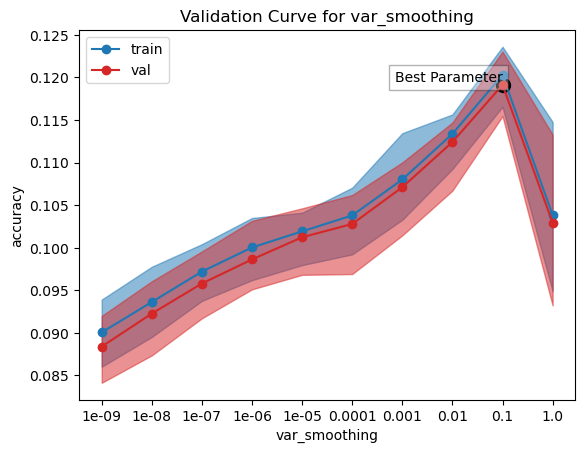

In [39]:
plt.figure()
x =  np.logspace(-9, 0, 10)
plt.plot(x, [info_accuracy_train[i][0] for i in range(len(x))],'-o', color='tab:blue', label='train')
plt.fill_between(
    x, 
    [info_accuracy_train[i][1] for i in range(len(x))], 
    [info_accuracy_train[i][2] for i in range(len(x))], 
    alpha=0.5, 
    color='tab:blue'
)
plt.plot(x, [info_accuracy_val[i][0] for i in range(len(x))],'-o', color='tab:red', label='val')
plt.fill_between(
    x, 
    [info_accuracy_val[i][1] for i in range(len(x))], 
    [info_accuracy_val[i][2] for i in range(len(x))], 
    alpha=0.5, 
    color='tab:red'
)
plt.xscale('log')
plt.xlabel('var_smoothing')
plt.ylabel('accuracy')
plt.title('Validation Curve for var_smoothing')
# plt.ylim(0.7, 1.02)
plt.scatter(best_parameter, best_val_score, marker='o', color='black',s=100)
plt.text(best_parameter, best_val_score, "Best Parameter", color='black', ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.3))
plt.ylabel('accuracy')
plt.legend()
plt.xticks(x, labels=np.logspace(-9, 0, 10))
plt.show()

<b><font size=5>Learning Curve<b>

In [17]:
%%time
# Create the RandomForestClassifier;  16.11
gnb = GaussianNB()

train_sizes, train_scores, val_scores = learning_curve(
    gnb, X_train_scaled, y_trainLabeled, cv=5,
    train_sizes=np.arange(0.1, 1.0, 0.1), scoring="accuracy"
)

CPU times: user 50.3 s, sys: 23.3 s, total: 1min 13s
Wall time: 1min 13s


In [18]:
train_sizes

array([ 8449, 16898, 25347, 33796, 42246, 50695, 59144, 67593, 76042])

In [19]:
train_scores

array([[0.0904249 , 0.10285241, 0.10285241, 0.10285241, 0.10285241],
       [0.07432832, 0.09338383, 0.09338383, 0.09338383, 0.09338383],
       [0.0788259 , 0.09582988, 0.09713181, 0.09713181, 0.09713181],
       [0.07607409, 0.0937389 , 0.08356018, 0.08356018, 0.08356018],
       [0.07605454, 0.09236377, 0.08471808, 0.08538086, 0.08538086],
       [0.07801558, 0.09135023, 0.08523523, 0.08736562, 0.08736562],
       [0.08109022, 0.0881239 , 0.0887664 , 0.08592588, 0.08592588],
       [0.08185759, 0.08845591, 0.09107452, 0.08413593, 0.08391401],
       [0.09193604, 0.09453986, 0.09451356, 0.08926646, 0.0849399 ]])

In [20]:
val_scores

array([[0.07848892, 0.09416276, 0.09430479, 0.09383137, 0.09331061],
       [0.06816891, 0.08748757, 0.0887658 , 0.0870615 , 0.08696681],
       [0.07422837, 0.09032808, 0.09122757, 0.09084884, 0.0910382 ],
       [0.07266616, 0.09018605, 0.08123846, 0.08161719, 0.0807177 ],
       [0.07266616, 0.08815036, 0.08284808, 0.08313213, 0.08147517],
       [0.07545919, 0.08715618, 0.08360555, 0.08687213, 0.08530985],
       [0.07787351, 0.08464707, 0.08535719, 0.08578327, 0.08393694],
       [0.07744745, 0.08507314, 0.09042276, 0.082422  , 0.08171188],
       [0.09013444, 0.09013871, 0.09354732, 0.08800833, 0.08237466]])

In [21]:
train_sizes = np.array([ 8449, 16898, 25347, 33796, 42246, 50695, 59144, 67593, 76042])

train_scores = np.array([[0.0904249 , 0.10285241, 0.10285241, 0.10285241, 0.10285241],
       [0.07432832, 0.09338383, 0.09338383, 0.09338383, 0.09338383],
       [0.0788259 , 0.09582988, 0.09713181, 0.09713181, 0.09713181],
       [0.07607409, 0.0937389 , 0.08356018, 0.08356018, 0.08356018],
       [0.07605454, 0.09236377, 0.08471808, 0.08538086, 0.08538086],
       [0.07801558, 0.09135023, 0.08523523, 0.08736562, 0.08736562],
       [0.08109022, 0.0881239 , 0.0887664 , 0.08592588, 0.08592588],
       [0.08185759, 0.08845591, 0.09107452, 0.08413593, 0.08391401],
       [0.09193604, 0.09453986, 0.09451356, 0.08926646, 0.0849399 ]])

val_scores = np.array([[0.07848892, 0.09416276, 0.09430479, 0.09383137, 0.09331061],
       [0.06816891, 0.08748757, 0.0887658 , 0.0870615 , 0.08696681],
       [0.07422837, 0.09032808, 0.09122757, 0.09084884, 0.0910382 ],
       [0.07266616, 0.09018605, 0.08123846, 0.08161719, 0.0807177 ],
       [0.07266616, 0.08815036, 0.08284808, 0.08313213, 0.08147517],
       [0.07545919, 0.08715618, 0.08360555, 0.08687213, 0.08530985],
       [0.07787351, 0.08464707, 0.08535719, 0.08578327, 0.08393694],
       [0.07744745, 0.08507314, 0.09042276, 0.082422  , 0.08171188],
       [0.09013444, 0.09013871, 0.09354732, 0.08800833, 0.08237466]])

In [22]:
info_accuracy_train = []
info_accuracy_val = []

best_val_score = 0
best_proportion = 0

for n, train_proportion in enumerate(np.arange(0.1, 1.0, 0.1)): 
    #test_scores
    acc_mean_train = train_scores[n].mean()
    acc_min_train = train_scores[n].min()
    acc_max_train = train_scores[n].max()
    info_accuracy_train.append((acc_mean_train, acc_min_train, acc_max_train))
    #val_scores
    acc_mean_val = val_scores[n].mean()
    acc_min_val = val_scores[n].min()
    acc_max_val = val_scores[n].max()
    if (acc_mean_val>best_val_score):
        best_val_score = acc_mean_val
        best_proportion = train_proportion
    info_accuracy_val.append((acc_mean_val, acc_min_val, acc_max_val))


info_accuracy_val

[(0.09081969, 0.07848892, 0.09430479),
 (0.08369011800000001, 0.06816891, 0.0887658),
 (0.087534212, 0.07422837, 0.09122757),
 (0.081285112, 0.07266616, 0.09018605),
 (0.08165438, 0.07266616, 0.08815036),
 (0.08368058, 0.07545919, 0.08715618),
 (0.083519596, 0.07787351, 0.08578327),
 (0.083415446, 0.07744745, 0.09042276),
 (0.08884069199999999, 0.08237466, 0.09354732)]

In [23]:
best_proportion

0.1

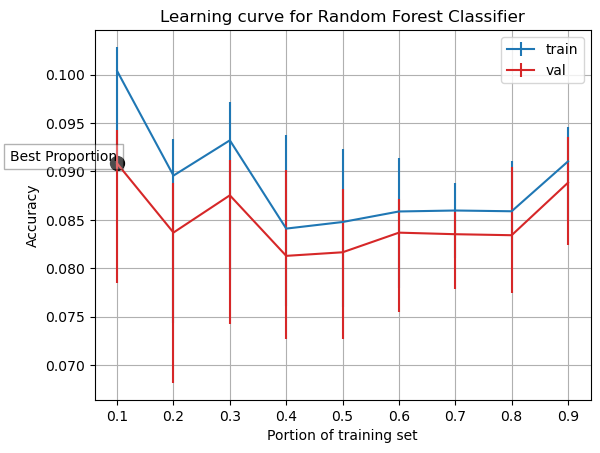

In [25]:
plt.figure()

plt.errorbar(
    [train_size for train_size in np.arange(0.1, 1.0, 0.1)], # x-location of each error bar
    [info_accuracy_train[i][0] for i in range(len(info_accuracy_train))], # y-location of each error bar
    # the size of each error bar
    yerr = [
        [info_accuracy_train[i][0]-info_accuracy_train[i][1] for i in range(len(info_accuracy_train))], 
        [info_accuracy_train[i][2]-info_accuracy_train[i][0] for i in range(len(info_accuracy_train))]
    ],
    color='tab:blue',
    label='train'
)

plt.errorbar(
    [train_size for train_size in np.arange(0.1, 1.0, 0.1)], # x-location of each error bar
    [info_accuracy_val[i][0] for i in range(len(info_accuracy_val))], # y-location of each error bar
    # the size of each error bar
    yerr = [
        [info_accuracy_val[i][0]-info_accuracy_val[i][1] for i in range(len(info_accuracy_val))], 
        [info_accuracy_val[i][2]-info_accuracy_val[i][0] for i in range(len(info_accuracy_val))]
    ],
    color='tab:red',
    label='val'
)
plt.grid()
plt.xlabel('Portion of training set')
plt.ylabel('Accuracy')
plt.title("Learning curve for Random Forest Classifier")
plt.xticks(np.arange(0.1, 1.0, 0.1), labels = np.arange(0.1, 1.0, 0.1).round(1))
plt.scatter(best_proportion, best_val_score, marker='o', color='black',s=100)
plt.text(best_proportion, best_val_score, "Best Proportion", color='black', ha='right', va='bottom', fontsize=10, bbox=dict(facecolor='white', alpha=0.3))
#plt.ylim(0.7, 1.02)
plt.legend()
plt.show()

In [31]:
best_combination

{'var_smoothing': 0.1}

<b><font size=5>Test the best combination on unseen data<b>

In [32]:
gnb_final = GaussianNB(
    var_smoothing = best_combination['var_smoothing']
)

gnb_final.fit(X_train_scaled, y_trainLabeled)
predictions = gnb_final.predict(X_test_scaled)

In [36]:
X_test_scaled.shape

(114580, 120)

In [37]:
predictions.shape

(114580,)

	CLASSIFICATION REPORT GAUSSIAN NAIVE BAYES (TEST-SET):
              precision    recall  f1-score   support

           0       0.59      0.01      0.01     34777
           1       0.18      0.23      0.20      2942
           2       0.05      0.04      0.04      1135
           3       0.07      0.13      0.09      1717
           4       0.08      0.24      0.12      2383
           5       0.03      0.00      0.01      3246
           6       0.08      0.44      0.13      2894
           7       0.08      0.68      0.15       686
           8       0.03      0.01      0.02      1455
           9       0.10      0.90      0.19      1607
          10       0.16      0.04      0.07      1730
          11       0.41      0.04      0.08      4477
          12       0.23      0.27      0.25     11171
          13       0.02      0.32      0.04      1604
          14       0.10      0.04      0.06      4426
          15       0.03      0.01      0.01      1542
          16       0.00  

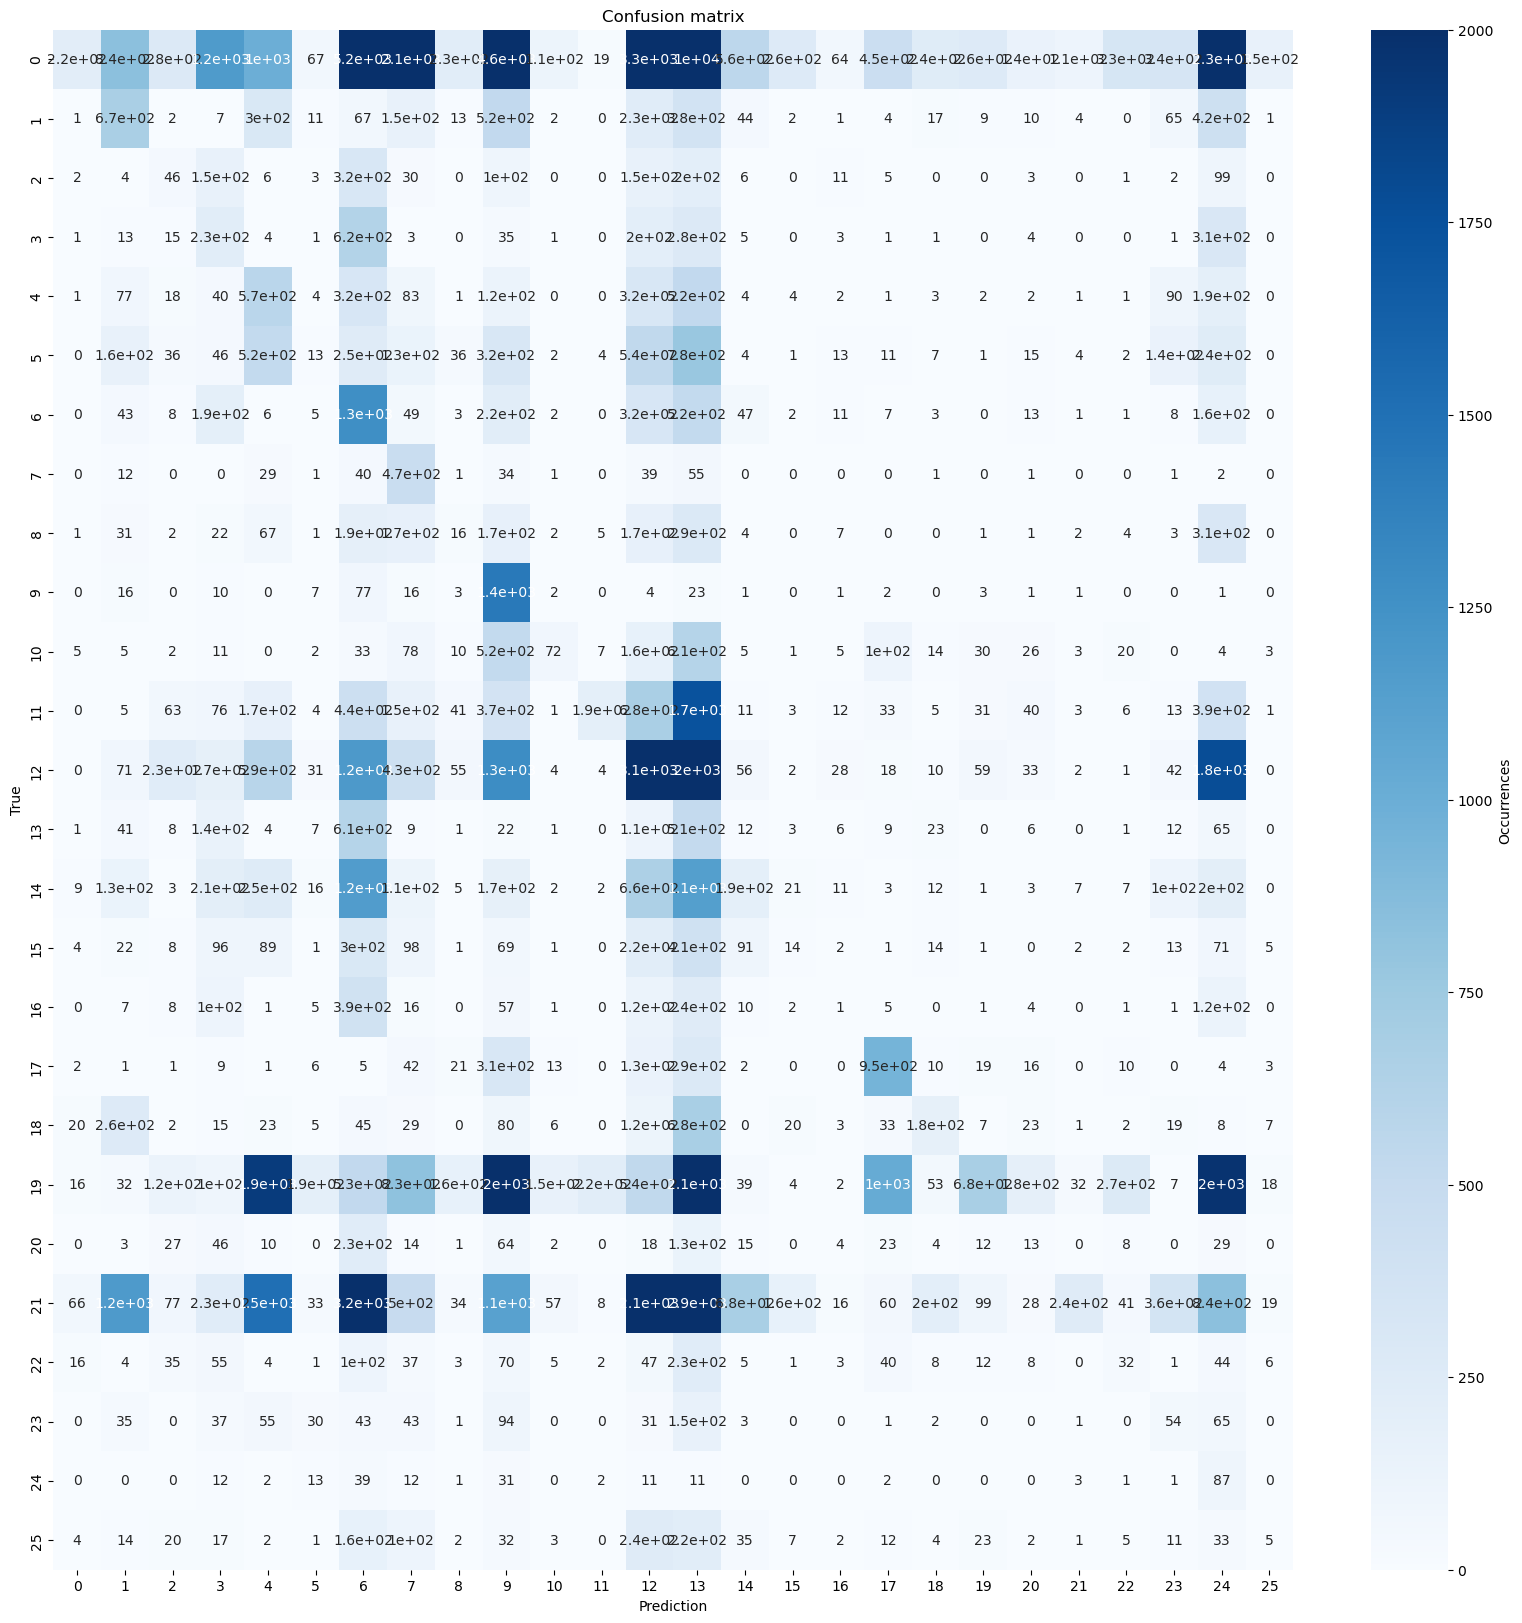

In [35]:
###--- RANDOM FOREST CLASSIFIER (TEST_SET) ---###
print("\tCLASSIFICATION REPORT GAUSSIAN NAIVE BAYES (TEST-SET):")
print(classification_report(y_testLabeled, predictions))

# get the confusion matrix of test set
confusion_test = confusion_matrix(y_testLabeled, predictions)

# visualize the confusion matrix
plt.figure(figsize=(20,20))
sns.heatmap(confusion_test, 
            cmap='Blues', 
            annot=True, 
            cbar_kws={'label':'Occurrences'}, 
            #xticklabels=labels, 
            #yticklabels=labels
            vmin=0, 
            vmax=2000,
           )
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Confusion matrix')
plt.show()